# Исследование объявлений о продаже квартир

##  Описание проекта 
В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 
Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.
Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных** 
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Откроем таблицу и изучим общую информацию о данных

In [188]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [189]:
#откроем датафрейм и выведем на экран первые 10 строк

data = pd.read_csv('/datasets/real_estate_data.csv')

data.head(10)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Данные склеились в одну строчку. Нужно внести поправки, указав в качестве разделителя знак табуляции \t.

In [190]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Таблица стала читабельна. Теперь посмотрим общую информацию о ней для дальнейшего анализа

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В нескольких столбцах есть пропуски. В следующем шаге найдем эти пропуски. Но пока посмотрим как выглядит гистаграмма для оценки качества данных.

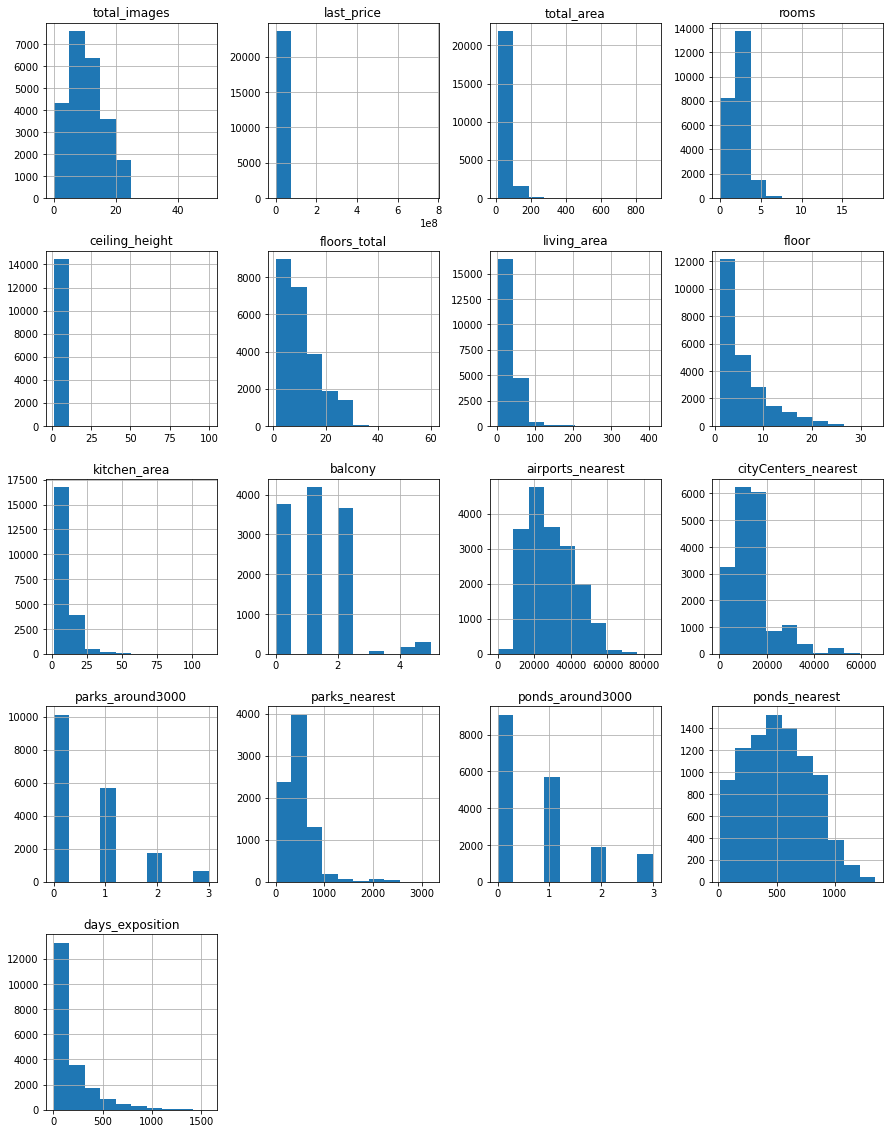

In [192]:
data.hist(figsize=(15, 20))
plt.show()

Не очень удачно отобразились столбцы last_price, living_area, ceiling_height. Нужно проверить данные в этих столбцах. 

## Предобработка данных

### Удаление пропусков

In [193]:
data.isna().sum().sort_values(ascending = False) #выведем количество пропущенных значений

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Согласно полученной информации пропуски в следующих столбцах:
- ceiling_height - здесь пропуски можно заменить медианной высотой потолков среди всех объявлений;  
- floors_total - здесь всего  86 (0,36 %) пропусков, пропуски можно заменить на "0", так как на ход исследования влияния не окажут;
- living_area - пропуски заменить можно медианным значением схожих квартир;
- is_apartment - необходимо этот столбец преобразовать в булев тип, где пропуски будут заменены на "False";
- kitchen_area - пропуски можно заменить медианными значениями площади кухни в квартирах с одинаковым количеством комнат;
- balcony - здесь пропуски скорее всего из-за отсутствия балкона в квартире, поэтому заменим на "0";
- locality_name - здесь пропуски можно заменить на "нет информации";
- airports_nearest - можно заменить медианным расстоянием от квартир в населенном пункте до аэропорта;
- cityCenters_nearest - так же можно заменить медианным расстоянием от квартир в населенном пункте до центра города;
- parks_around3000 - скорее всего поблизости нет парков, значит заменим пропущенные значения на "0";
- parks_nearest - замену можно произвести исходя из медианного расстояния до ближайшего парка в каждом населенном пункте и значения в столбце parks_around3000, отличного от нуля;
- ponds_around3000 - скорее всего поблизости нет водоемов, значит заменим пропущенные значения на "0";
- ponds_nearest - замену можно произвести исходя из медианного расстояния до ближайшего водоёма в каждом населенном пункте и значения в столбце ponds_around3000, отличного от нуля;
- days_exposition -  здесь значения заменим на "0";




Начнем с самого простого: заменим в столбцах balcony, parks_around3000, floors_total, ponds_around3000 и days_exposition пропуски на "0"

In [194]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['floors_total'] = data['floors_total'].fillna(0)
data['days_exposition'] = data['days_exposition'].fillna(0)

In [195]:
# посмотрим есть ли пропуски в этих столбцах
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition             0
dtype: int64

Пропусков в столбцах balcony, parks_around3000 и ponds_around3000 нет. 
Теперь в столбце locality_name пропуски заменим на "нет информации".

In [196]:
data['locality_name'] = data['locality_name'].fillna('нет информации')

С помощью цикла уберем пропуски в столбцах parks_nearest и ponds_nearest. 

In [197]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (~data['parks_around3000'].isna()), 'parks_nearest'] = \
    data.loc[data['locality_name'] == t, 'parks_nearest'].median()


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

Для оставшихся пропусков, где нет в близости парков и мы не можем заполнить медианным значением, поставим "заглушки"

In [198]:
data['parks_nearest'] = data['parks_nearest'].fillna(0)

Те же действия проделаем со столбцом ponds_nearest.

In [199]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (~data['ponds_around3000'].isna()), 'ponds_nearest'] = \
    data.loc[data['locality_name'] == t, 'ponds_nearest'].median()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [200]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

Заполним медианным значением оставщиеся столбцы

In [201]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['living_area'] = data['living_area'].fillna(data['living_area'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())

Разберемся со столбцом is_apartment. Здесь произведем преобразование данных в булев тип, где пропускам будет присвоено значение "False".

In [202]:
data['is_apartment']=data['is_apartment'].astype('bool')
data['is_apartment'].head(20)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
Name: is_apartment, dtype: bool

Большая часть пропусков было заменено медианным значением, так как медианна оказывает наименьше влияние на средние показатели. Где-то был применено так называемые "заглушки". Разобрав природу пропусков было обнаружено, что некоторые пропуски являются добавленными пользователем. Так например, в столбце is_apartmentt скорее всего пропуск возник из-за незнания типа своей кваритиры. А вот в столбце balcony пропуск вероятнее всего возник из-за отсутствия балкона в квартире, что вполне реально. Точно так же и в столбцах ponds_around3000 и parks_around3000, поблизости нет парков и водоемов.   Однако, удивителен тот факт, что по многим населенным пунктам сведения о расстояниях до их центра либо до аэропорта в принципе отсутствуют. Возможно, это вызвано какой-либо ошибкой сервиса.В days_exposition возможно информации нет, например, по причине того, что неизвестно когда было закрыто объявление о продаже, то есть, фактически, сделка была совершена, но не была закрыта на онлайн-ресурсе. Во всех остальных случаях причина пропусков незвестна. Может быть пользователь не внес данные, а может это какая-то техническая ошибка.



### Изменение типов данных

Для удобства работы произведем замены типов данных в следующих столбцах:
- first_day_exposition - datetime
- balcony - int64
- floors_total - int64
- parks_around3000 - int64
- ponds_around3000 - int64
- days_exposition - int64

В первом случае замена необходима, поскольку для анализа нас будет интересовать только дата размещения объявления. В остальных случаях значения в столбцах принимают целые значения, и нам нет смысла их оставлять вещественными.

In [203]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Как видим типы данных в нужных столбцах успешно изменились.

### Обработка дубликатов

В столбце locality_name встречаются дубликаты. Нужно их устранить. Выведем уникальные значения в столбце

In [204]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В этом столбце оставим только название населенного пункта, так будет проще работать с данными

In [205]:
#создаим список значений, которые мы хотим убрать из названий
locations=['посёлок ', 'городской посёлок ', 'городского типа ','коттеджный ', 'имени ','городского типа имени ',\
           'городской ', 'деревня ', 'поселок городского типа ','поселок ', 'посёлок городского типа ', \
           'садовое товарищество ', 'поселок городского типа имени ', 'поселок станции ', 'село ', \
           'садоводческое некоммерческое товарищество ','коттеджный посёлок ', 'станции ']

for location in locations:
    data['locality_name']=data['locality_name'].str.replace( location, '')
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Оставив только название населенного пункта, будет проще работать с данными

### Обработка аномальных значений

In [206]:
data.describe() #для начала посмотрим какие значения имеются

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.635090,34.099892,5.892358,10.428526,0.591080,28310.148023,13936.792797,0.469049,342.027575,0.590911,384.384193,156.608844
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.616396,21.162096,4.885249,5.631126,0.959298,11090.330161,7553.779633,0.748534,203.631027,0.883999,215.053838,213.546873
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.400000,0.000000,21183.000000,10927.000000,0.000000,0.000000,0.000000,372.000000,22.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,460.000000,0.000000,503.000000,74.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,41.100000,8.000000,11.440000,1.000000,34327.000000,15248.500000,1.000000,460.000000,1.000000,503.000000,199.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,733.000000,3.000000,859.000000,1580.000000


Смущает  столбец ceiling_height, где высота потолка максимальное значение равна 100 и минимальное 1. Таких потолков не бывает,скорее всего неверно указали 

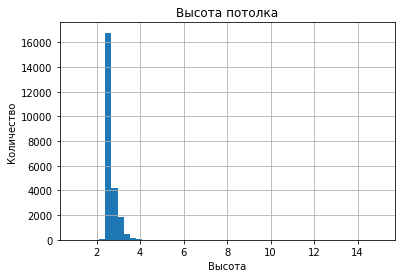

In [207]:
data['ceiling_height'].hist(bins=50, range=(1, 15))
plt.title('Высота потолка')
plt.xlabel('Высота')
plt.ylabel('Количество')
plt.show()

Основные размеры потолков лежат в диапазоне от 2,3 до 4 метров Изменим параметры гистораммы для лучшего отображения

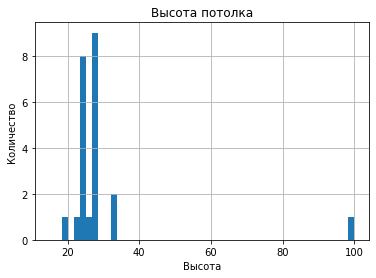

In [208]:
data['ceiling_height'].hist(bins=50, range=(15, 100))
plt.title('Высота потолка')
plt.xlabel('Высота')
plt.ylabel('Количество')
plt.show()

На этой гистограмме имеется "всплеск" значений около 10 до примерно 35 метров. Здесь, вероятнее всего, была пропущена запятая, и таким образом высота потолка стала больше в 10 раз. Заменим эти значения на более реальные.

In [209]:
for i in data['ceiling_height']:
    if i>=10:
        data['ceiling_height']=data['ceiling_height'].replace({i:i/10})

data['ceiling_height'].describe() 

count    23699.000000
mean         2.697798
std          0.237643
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

В данных много столбцов и не очень удобно по каждому столбцу строить графики, поэтому для описания данных был применен метод describe. Во всех стобцах, кроме ceiling_height, не выделялись какие-либо ошибочные значения. Поэтому было подробно рассмотрен столбец ceiling_height и по нему устранены аномалии. Аномалия в данном столбце возник из-за неверного указания единицы измерения высоты. Возможно это даже техническая ошибка, но скорее всего это сами пользователи так внесли данные.


# 3. Посчитаем и добавим в таблицу новые столбцы

Добавим и посчитаем следующие столбцы:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [210]:
data['price_m'] = data['last_price']/data['total_area'] #цена одного квадратного метра


In [211]:
#месяц и год публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

In [212]:
#создадим функцию, где будет указана тип этажа квартиры

def floor_classification(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'     
data['floor_category'] = data.apply(floor_classification, axis = 1)


In [213]:
#расстояние до центра города в километрах
data['cityCenters_km'] = round(data['cityCenters_nearest']/1000, 0)


In [214]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday_exposition,month_exposition,year_exposition,floor_category,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,460.0,2,503.0,0,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,0.0,0,584.5,81,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,460.0,2,503.0,558,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,True,...,460.0,3,503.0,424,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,460.0,1,503.0,121,100000.000000,1,6,2018,другой,8.0


Все столбцы, которые хотели добавить, на месте. 


# 4. Проведем исследовательский анализ данных

 Изучим следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.


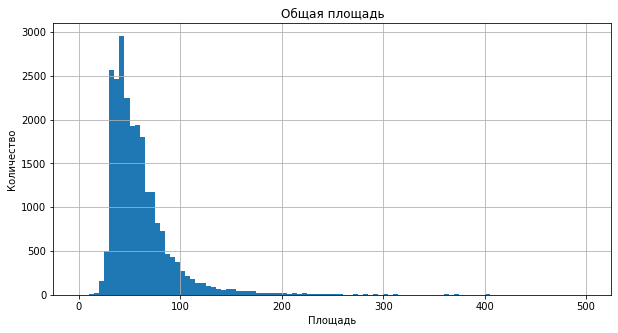

In [215]:
# гистограмма общая площадь
data.hist('total_area', bins=100, range=(0,500), figsize=(10,5))
plt.title('Общая площадь')
plt.xlabel('Площадь')
plt.ylabel('Количество')
plt.show()

По гистограмме видно, что основную долю рынка занимают квартиры с площадью около 50 и до 100 кв.м. 

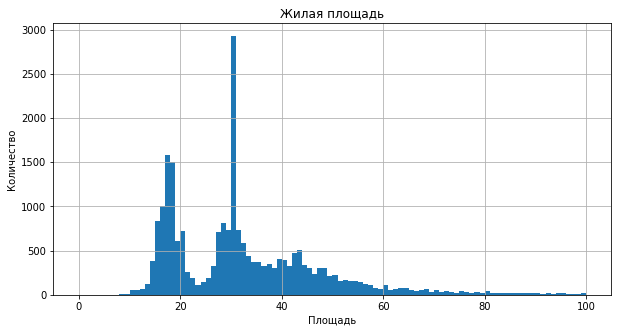

In [216]:
# гистограмма жилая площадь
data.hist('living_area', bins=100, range=(0,100), figsize=(10,5))
plt.title('Жилая площадь')
plt.xlabel('Площадь')
plt.ylabel('Количество')
plt.show()

На гистограмме можно заметить 2 пика - около 18-19 кв. метров и около 30 кв. метров. Предположительно, это вызвано тем, что основную долю рынка составляют одно- и двухкомнатные квартиры. Также здесь на первый пик могли оказать влияние и студии, поскольку их жилая площадь в среднем как раз близка к 20 кв. метрам.

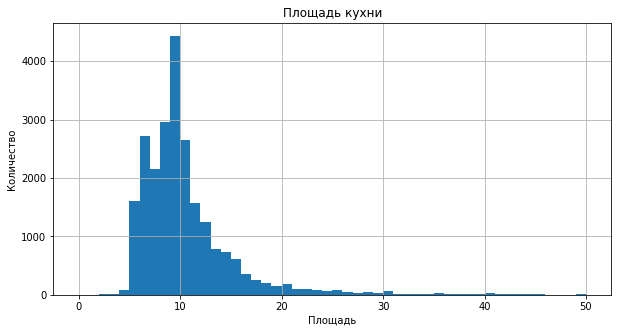

In [217]:
# гистограмма площадь кухни
data.hist('kitchen_area', bins=50, range=(0,50), figsize=(10,5))
plt.title('Площадь кухни')
plt.xlabel('Площадь')
plt.ylabel('Количество')
plt.show()

Площадь кухни в основном составляет 5-10 кв.м., что  соответствует среднестатистическим квартирам.

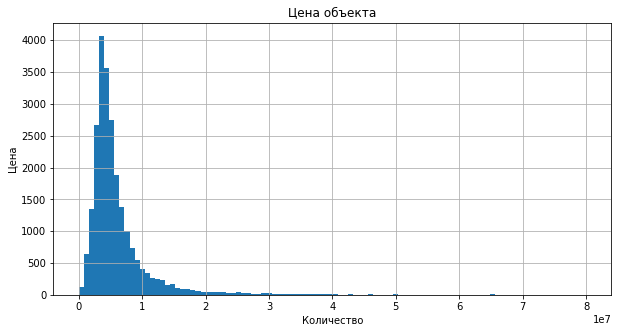

In [218]:
# гистограмма цена объекта
data.hist('last_price', bins=100, range=(0,80000000), figsize=(10,5))
plt.title('Цена объекта')
plt.xlabel('Количество')
plt.ylabel('Цена')
plt.show()

Цены на квартиры составляют в среднем 3,5-4 млн.руб.

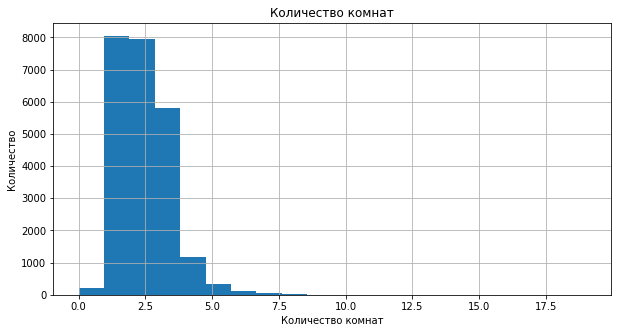

In [219]:
# гистограмма количество комнат
data.hist('rooms', bins=20, figsize=(10,5))
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество')
plt.show()

Основную долю объявлений составляют одно- и двухкомнатные квартиры (около 8000 объявлений каждая). Трехкомнатных квартир уже меньше - около 6000 объявлений. Четырехкомнатных квартир тоже немало - чуть более 1000 объявлений. Остальные квартиры представлены уже крайне редко.

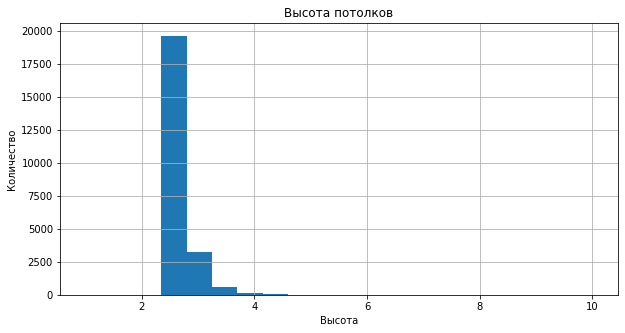

In [220]:
# гистограмма высота потолков
data.hist('ceiling_height', bins=20, figsize=(10,5))
plt.title('Высота потолков')
plt.xlabel('Высота')
plt.ylabel('Количество')
plt.show()

Здесь ничего необычного. Основная часть квартир с высотой потолков от 2,5 до 3 метров

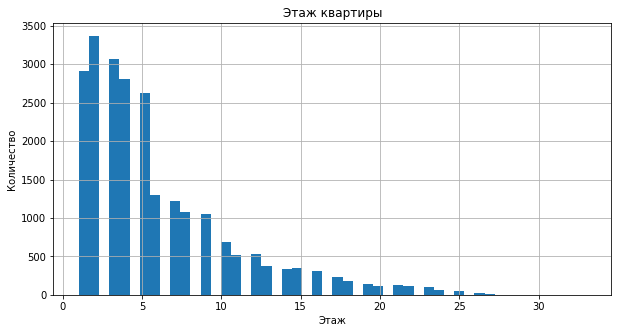

In [221]:
# гистограмма этаж квартиры
data.hist('floor', bins=50, figsize=(10,5))
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество')
plt.show()

Большая часть продаваемых квартир находится с 1 по 5 этаж

In [222]:
#оценка типа этажа квартиры
data['floor_category'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_category, dtype: int64

Здесь можно не строить гистограмму метод value_counts() посчитал уникальные значения в столбце. В основном продаются квартиры, расположенные не на крайних этажах. 

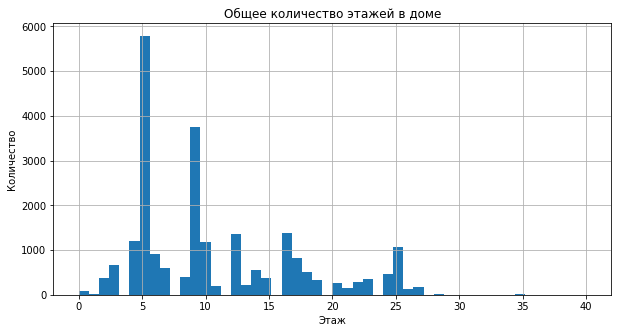

In [223]:
# общее количество этажей в доме
data.hist('floors_total', bins=50, range=(0,40), figsize=(10,5))
plt.title('Общее количество этажей в доме')
plt.xlabel('Этаж')
plt.ylabel('Количество')
plt.show()

Пятиэтажных домов гораздо больше всего в объявлениях, чем всех остальных. Далее следуют девятиэтажные дома. Остальные дома представлены менее широко.

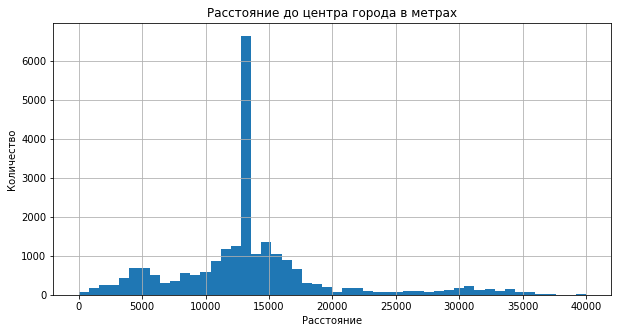

In [224]:
# расстояние до центра города в метрах
data.hist('cityCenters_nearest', bins=50, range=(0,40000), figsize=(10,5))
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние')
plt.ylabel('Количество')
plt.show()

Здесь мы имеем несколько пиков разной степени выраженности:

На этой гистограмме видим, что в основном квартиры продаются с удаленностью около 10000 до 18000 метров до центра города. Есть выраженный пик, который возник в результате заполнения пропусков медианным значением.

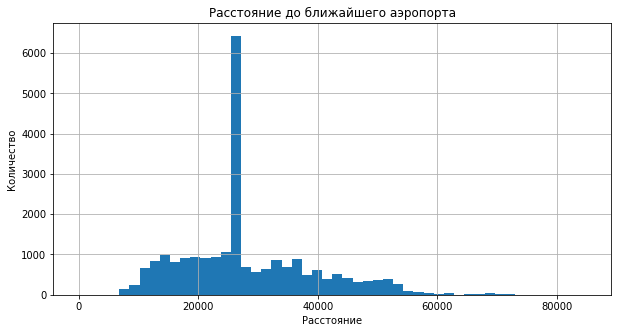

In [225]:
# расстояние до ближайшего аэропорта
data.hist('airports_nearest', bins=50, figsize=(10,5))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние')
plt.ylabel('Количество')
plt.show()

В объявлениях квартиры продаются с удаленностью от аэропорта около 10000 и до 50000 метров. Пропуски создали пик в медиане

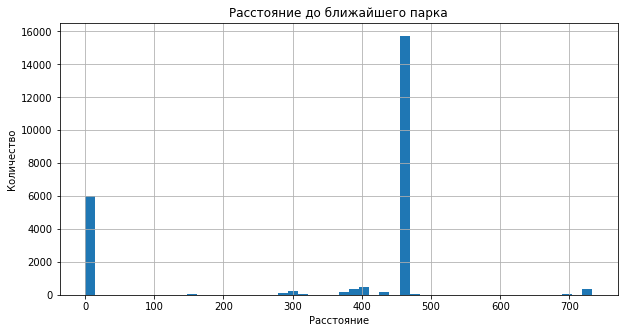

In [226]:
# расстояние до ближайшего парка
data.hist('parks_nearest', bins=50, figsize=(10,5))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние')
plt.ylabel('Количество')
plt.show()

Расстояние до ближайщего парка приходиться на значения 400-500 метров

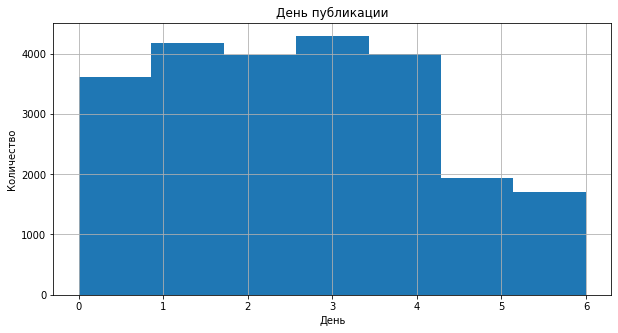

In [227]:
# день публикации объявления
data.hist('weekday_exposition', bins=7, figsize=(10,5)) 
plt.title('День публикации')
plt.xlabel('День')
plt.ylabel('Количество')
plt.show()


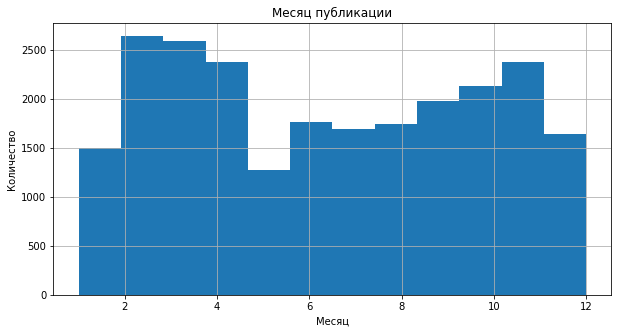

In [228]:
#месяц публикации объявления
data.hist('month_exposition', bins=12, figsize=(10,5)) 
plt.title('Месяц публикации')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

Объявления в будние дни публикуются чаще, чем в выходные. А  вот по месяцам распределение имеет свои особенности. В январе, мае и декабре они размещались реже, чем в другие месяцы. Наибольщее число размещений приходится на февраль. Летом объявления размещаются в среднем одинаково, а в сентябре начинается рост, который достигает пика в ноябре.


Изучим как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

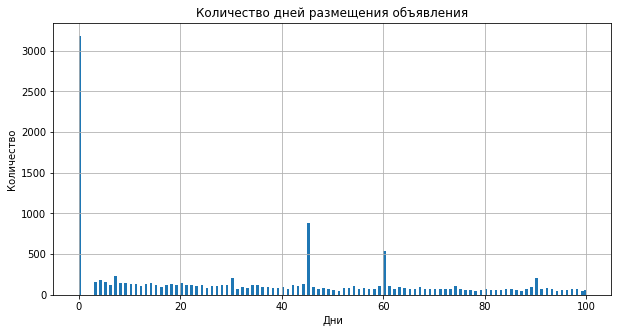

In [229]:
data.hist('days_exposition', bins=200, range=(0,100), figsize=(10,5))
plt.title('Количество дней размещения объявления')
plt.xlabel('Дни')
plt.ylabel('Количество')
plt.show()

In [230]:
data['days_exposition'].describe() #посмотрим на параметры этого столбца

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Мадиана в этом столбце равна 74 дням. Среднее значение продажи квартиры 156 дней. Максимально долго квартиры продавались 1580 дней. 199 дней (третий квартиль этого столбца) можно считать уже долгой продажей. а вот значение быстрая продажа можно взять параметр второго квартиля. В данном случае это 22 дня.
Много значений около нуля. Скорее всего это выбросы. Построим диаграмму размаха для оценки данных.
Есть пики в 45, 60 и 90 дней. Это особенность размещения объявления в Яндексе. До 4,5 млн — 45 дней действует публикация, от 4,5 до 10 млн — 60 дней, от 10 млн — 90 дней.

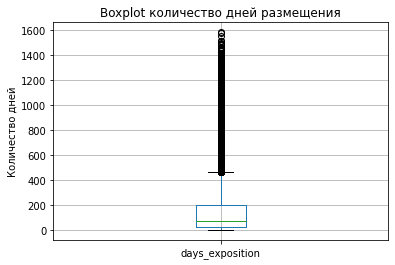

In [231]:
data.boxplot('days_exposition')
plt.ylabel('Количество дней')
plt.title('Boxplot количество дней размещения')
plt.show()

Как видно по диаграмме действительно в данном столбце присутствуют выбросы. Часть изних возник в следствии того, что пропуски заменили значениями "0".

Изучим какие факторы больше всего влияют на общую (полную) стоимость объекта?
 Построим сводную таблицу, состоящей из общей площади; жилой площади; площади кухни; количества комнат; этажа, на котором расположена квартира (первый, последний, другой); даты размещения (день недели, месяц, год).


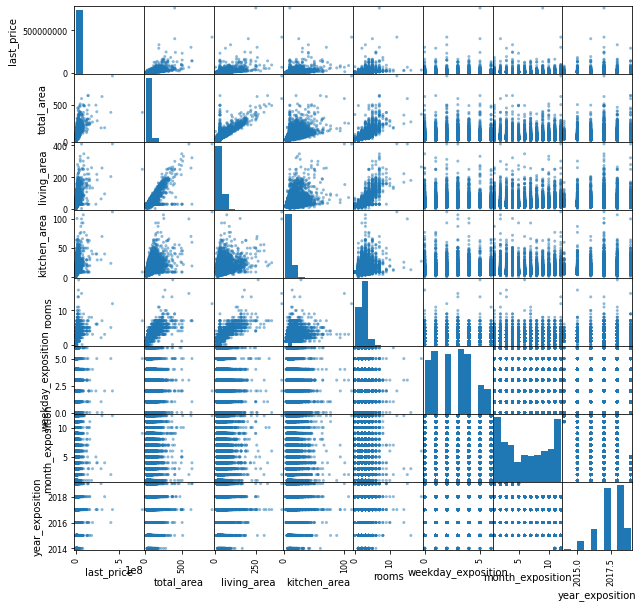

In [232]:
data_f = data.loc[:,['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_category', 'weekday_exposition', 'month_exposition', 'year_exposition']]
pd.plotting.scatter_matrix(data_f, figsize=(10, 10));

In [233]:
#считаем корреляцию
data_corr=['total_area', 'living_area', 'kitchen_area', 'rooms']
for d in data_corr:
    corr=data['last_price'].corr(data[d])
    display(f'Корреляция между last_price и {d} составляет: {corr:0.2}')

'Корреляция между last_price и total_area составляет: 0.65'

'Корреляция между last_price и living_area составляет: 0.54'

'Корреляция между last_price и kitchen_area составляет: 0.44'

'Корреляция между last_price и rooms составляет: 0.36'

Из графиков и коэффицентов корреляции видно, что больше всего влияет на стоимость объекта общая площадь квартиры. Корреляция составляет 0,65. С ростом площади и количества комнат, растет и стоимость. График зависимости 'last_price' от 'total_area' подтверждает зависимость стоимости недвижимости от ее общей площади. Остальные факторы не оказывают существенного влияния на стоимость.


Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [234]:
locality_top = data.pivot_table(index='locality_name', values='price_m', aggfunc=[ 'count','mean'])
locality_top.columns = ['count','mean']
#создаем список из верхних топ-10 городов
locality_top.sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15721,114849.008794
Мурино,590,86087.512050
Кудрово,472,95324.930544
Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
Парголово,327,90175.913458
Гатчина,307,68746.146763


Самая высокая стоимость жилья в Санкт-Петербурге, а низкая в Выборге.

Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. 

In [235]:
locality_spb1 = data.query('locality_name == "Санкт-Петербург"')
locality_spb =locality_spb1.pivot_table(index='cityCenters_km', values='last_price', aggfunc='mean')
locality_spb['last_price_mln']=locality_spb['last_price']/1000000
locality_spb.head(15)

,last_price,last_price_mln
cityCenters_km,,
0.0,3.144912e+07,31.449116
1.0,2.120672e+07,21.206721
2.0,1.778832e+07,17.788320
3.0,1.112658e+07,11.126581
4.0,1.330428e+07,13.304280
5.0,1.449912e+07,14.499121
6.0,1.533842e+07,15.338418
7.0,1.477515e+07,14.775153
8.0,9.957717e+06,9.957717


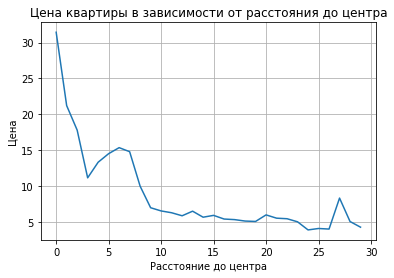

In [236]:
locality_spb['last_price_mln'].plot(grid=True)
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена')
plt.title('Цена квартиры в зависимости от расстояния до центра')
plt.show()

Cамые дорогие квартиры находятся на расстоянии до 3 км от центра. Далее цена снижается и только на растоянии 6-7км и 26км есть небольшой пик. 

# 5. Общий вывод

Была проделана большая работа, в ходе которой на начальном этапе была проведена подготовка данных: устранены пропущенные значения, изменены типы данных, удалены дубликаты, найдены и устранены аномалии. Затем для анализа данных были добавленны необходимые столбцы и построены различные графики.
Исследование показало, что основную долю рынка составляют одно- и двухкомнатные квартиры площадью от 30 до 50 кв.м..Большую часть рынка составляют пяти- и девятиэтажные дома. Средняя стоимость жилья на рынке находится в промежутке от 3,5 до 4 млн. рублей и главным фактором, влияющим на стоимость объекта недвижимости, является общая площадь. Самое дорогое жилье располагается в Санкт-Петербурге, а самое дешевое в Выборге. Квартиры продаются в среднем за 3 месяца.  

